In [1]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

The value of the entalphy of a given species $j$ at an arbitrary temperaure $T_{eval}$ can be computed according to the formula:
$$
\tilde{H}_j(T) = \tilde{H}_j^0 + \int_{T^0}^{T_{eval}} \tilde{c}_{p_j} dT
$$

Where:

- $\tilde{H}_j^0$ $[J/(kmol)]$ is the standard formation enthalpy of species $j$
- $\tilde{c}_{p_j}$ $[J/(kmol \cdot K)]$ is the specific molar heat capacity at constant pressure of species $j$ 
- ${T^0}$ is the Standard temperature ($298.15 K$)

$\tilde{c}_{p_j}$ is a quantity dependent on the temperature, thus we need to account for a function describing this relation. 

An example of it is the **Hyperbolic Function** for inorganic and organic compounds (Perry's Chemical Engineering Handbook - *Alias:* 'The Bible'):
$$
\tilde{c}_{p_j} = C1 + C2 \left[ \frac{C3/T}{sinh(C3/T)} \right]^2 + C4 \left[ \frac{C5/T}{cosh(C5/T)} \right]^2
$$

Here, the coefficients $C1$, $C2$, $C3$, $C4$, and $C5$ are dependent on the species $j$ and are regressed experimentally (we will talk about *Regression* in Q2 - Lecture 6).

In this example, we want to evaluate the heat capacity of carbon dioxide ($CO_2$) at $T_{eval} = 500K$. According to Perry's Chemical Engineering Handbook, the coefficients for carbon dioxide are the following:

- $C1 = 0.2937 \cdot 10^{5}$
- $C2 = 0.3454 \cdot 10^{5}$
- $C3 = 1.428 \cdot 10^{3}$
- $C4 = 0.264 \cdot 10^{5}$
- $C5 = 588$

To achieve that we need to solve the following integral (*try to do it analytically! ;)*):
$$
\tilde{H}_j(T) = \tilde{H}_j^0 + \int_{T^0}^{T_{eval}} C1 + C2 \left[ \frac{C3/T}{sinh(C3/T)} \right]^2 + C4 \left[ \frac{C5/T}{cosh(C5/T)} \right]^2 dT
$$

In [17]:
def cp_hyperbolic_function(temperature: float) -> float:
    """Function returning the value of the cp of carbon dioxide at a given temperature

    Args:
        temperature (float): temperature of the system at which we evaluate the cp of carbon dioxide

    Returns:
        float: cp_CO2(temperature)
    """
    C1 = 0.2937e5
    C2 = 0.3454e5
    C3 = 1.428e3
    C4 = 0.264e5
    C5 = 588
    cp = C1 + C2*((C3/temperature)/np.sinh(C3/temperature))**2 + C4*((C5/temperature)/np.cosh(C5/temperature))**2

    return cp

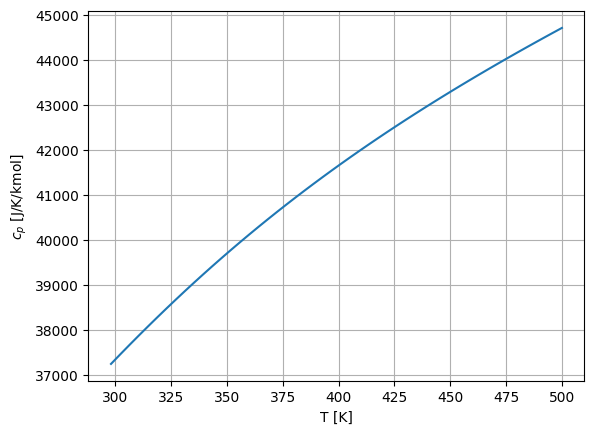

In [18]:
# Let's have a look at the function to be integrated
x_grid = np.linspace(298.15, 500)
fig, ax = plt.subplots()
ax.plot(x_grid, cp_hyperbolic_function(x_grid))
ax.set_xlabel("T [K]")
ax.set_ylabel("$c_p$ [J/K/kmol]")
ax.grid()

In [30]:
# Define discretization specs for numerical integration
a = 298.15                                   # left boundary
b = 500.                                     # right boundary
n_points = 10                           # number of grid points

In [31]:
# Rectangles method for numerical integration (left corner)
def rectangles_left(func: Callable, a: float, b: float, N: int):
    """Function implementing a rectangle method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)                  # define the discretization grid
    h = x_edges[1] - x_edges[0]                     # step size
    for i in range(N - 1):
        left_corner = x_edges[i]                    # left corner
        integral += h * (func(left_corner))
    return integral

In [32]:
# Compute the integral value using rectangles method (right corner)
integral_rl = rectangles_left(func=cp_hyperbolic_function, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_rl/1000} $J/mol$")

The result of the integral defined in [298.15,500.0] is 8272.331889390523 $J/mol$


In [33]:
# Rectangles method for numerical integration (right corner)
def rectangles_right(func: Callable, a: float, b: float, N: int):
    """Function implementing a rectangle method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)                  # define the discretization grid
    h = x_edges[1] - x_edges[0]                     # step size
    for i in range(N - 1):
        right_corner = x_edges[i+1]                    # right corner
        integral += h * (func(right_corner))
    return integral

In [34]:
# Compute the integral value using rectangles method (right corner)
integral_rr = rectangles_right(func=cp_hyperbolic_function, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_rl/1000} $J/mol$")

The result of the integral defined in [298.15,500.0] is 8272.331889390523 $J/mol$


In [35]:
def composite_trapezoid(func: Callable, a: float, b: float, N: int):
    """Function implementing a trapezoid method for numerical integration

    Args:
        func (Callable): A function to be integrated
        a (float): Left domain boundary
        b (float): Right domain boundary
        N (int): Number of points for the domain discretization

    Returns:
        float: The value of the integral defined in the domain [a,b]
    """
    integral = 0
    x_edges = np.linspace(a, b, N)
    h = x_edges[1] - x_edges[0]         # the step size
    for i in range(N - 1):
        x1 = x_edges[i]                 # left corner
        x2 = x_edges[i + 1]             # right corner
        integral += 0.5 * h * (func(x1) + func(x2))
    return integral

In [36]:
# Compute the integral value using composite trapezoid
integral_tr = composite_trapezoid(func=cp_hyperbolic_function, a=a, b=b, N=n_points) 

print(f"The result of the integral defined in [{a},{b}] is {integral_rl/1000} $J/mol$")

The result of the integral defined in [298.15,500.0] is 8272.331889390523 $J/mol$


## Error Analysis

In [37]:
# Analytical solution in [0, 1]
analytical_integral = np.exp(1) - 2

Text(0, 0.5, 'Relative error [%]')

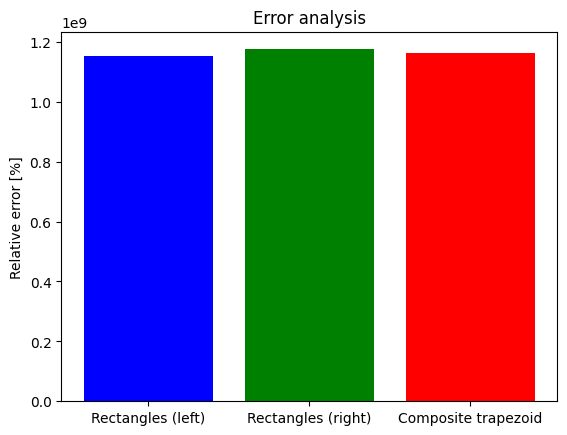

In [39]:
# Bar chart showing the relative error of the numerical integration compared with the analytical solution
fig, ax = plt.subplots()
ax.bar(["Rectangles (left)", "Rectangles (right)", "Composite trapezoid"], 
       [np.abs(analytical_integral-integral_rl)/analytical_integral * 100, 
        np.abs(analytical_integral-integral_rr)/analytical_integral * 100, 
        np.abs(analytical_integral-integral_tr)/analytical_integral * 100], 
        color=['blue', 'green', 'red'])
ax.set_title("Error analysis")
ax.set_ylabel("Relative error [%]")